## Machine Learning
### Sesion 3

En esta sesión veremos:
 
1. Introducción
    * Que es machine learning?
    * Tipos de machine learning
2. Modelos de ML
    * Regresion Lineal
        * Sistema de Ecuaciones
        * Gradiente Descendente

### 1. Introducción:
#### Que es machine learning?

Machine Learnig o Aprendizaje Automatico es la capacidad que tiene un sistema/algoritmo para identificar patrones y/o compartamientos con el fin de generalizar dichos comportamientos (determinados por variables (features)). ML crea programas con parámetros ajustables (tunable parameters) que se ajustan automáticamente para mejorar el comportamiento (performance) al ajustarse a los datos vistos anteriormente.

Usar machine learning es darle la capacidad a un programa de aprender como clasificar los datos que se le proporcionen sin necesidad de escribir el codigo explicitamente

<img src="ML.png">

#### Tipos de machine learning

* Supervisados: 
    * Datos etiquetados (y)
    * Retroalimentación (medida de rendimiento)
    * Predice futuro/resultados
* No supervisados:
    * Datos no etiquedatos
    * No retroalimentacion
    * Encuentra patrones, comportamientos ocultos en los datos
* Semisupervidados:
    * Mix entre supervisados y no supervisados
    * Algunas observaciones estan etiquetados (y) otras no
    * Se usa el subconjunto de entrenamiento etiquetado (y) para etiquetar la parte no etiquetada de el conjunto de entrenamiento, que luego también utilizamos para el entrenamiento modelo

<img src="ML_TYPES.png">

### 2. Modelos de ML:
#### Regresión Lineal

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools

plt.style.use('ggplot')

In [2]:
# Download and load the update dataset.
urlDataset = 'https://github.com/vanejaime/Curso_Python_CD/raw/master/datasets/houses_prices_prediction.csv.zip'
data = pd.read_csv(urlDataset)
data.head()

,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
plt.style.use('bmh')
y = data[' price'].values
X = data['area'].values

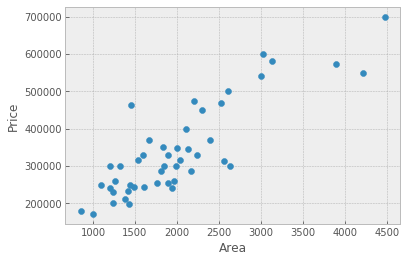

In [4]:
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Normalize data

## $$ x = \frac{x -\overline x}{\sigma_x} $$ 

In [5]:
y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

In [6]:
y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

Text(0, 0.5, 'Price')

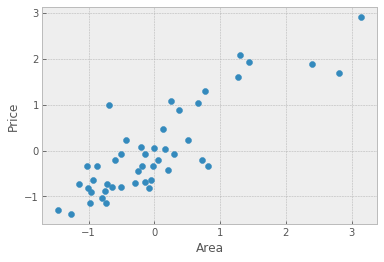

In [7]:
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')

## Forma de un RL

## $$h_\beta(x) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $h_\beta(x)$ es la variable de respuesta
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente para $x_1$ (la primera variable)
- $\beta_n$ es el coeficiente para $x_n$ (la n variable)

Los valores $\beta$ son llamados **coeficientes del modelo**:

- Estos valores son estimados (o "aprendidos") durante el proceso de ajuste(fitting) usando el  **criterio de minimos cuadrados**.
- Específicamente, encontramos la línea (matemáticamente) que minimiza la **suma de residuos al cuadrado** (o "suma de errores al cuadrado").
- Una vez que hayamos aprendido estos coeficientes, podemos usar el modelo para predecir la respuesta.

![Estimating coefficients](https://raw.githubusercontent.com/justmarkham/DAT8/master/notebooks/images/estimating_coefficients.png)

En el diagrama anterior:

- Los puntos negros son los **valores observados** de x , y
- La línea azul es nuestra **línea de mínimos cuadrados**
- Las líneas rojas son los **residuos**, que son las distancias verticales entre los valores observados y la línea de mínimos cuadrados. 

###  Función de Costo

El objetivo es estimar los parametros $\beta$ que minimicen la suma de los errores al cuadrado

## $$J(\beta_0, \beta_1)=\frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

In [8]:
# creamos X 
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]

In [9]:
#Supongamos unos betas
beta_ini = np.array([-1, 1])

In [10]:
#Calculemos la RL
def lr_h(beta,x):
    return np.dot(beta, x.T)

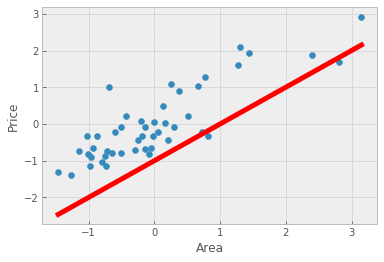

In [11]:
plt.scatter(X, y)
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [12]:
# Funcion de Costo
def lr_cost_func(beta, x, y):
    res = 0
    for i in range(x.shape[0]):
        res += (lr_h(beta,x[i, :]) - y[i]) ** 2
    res *= 1 / (2*x.shape[0])
    return res
lr_cost_func(beta_ini, X_, y)

0.6450124071218748

### Entendamos la Función de Costo

Veamos la función de costo para diferentes valores de $\beta$

In [13]:
beta0 = np.arange(-15, 20, 1)
beta1 = 2

In [14]:
beta0

array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19])

In [15]:
beta1

2

Text(0, 0.5, 'J(beta) o ....')

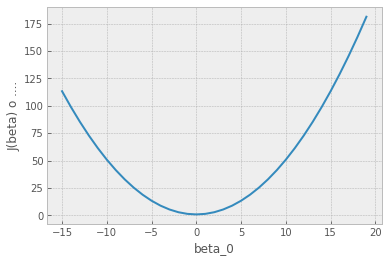

In [16]:
cost_func=[]
for beta_0 in beta0:
    cost_func.append(lr_cost_func(np.array([beta_0, beta1]), X_, y) )

plt.plot(beta0, cost_func)
plt.xlabel('beta_0')
plt.ylabel('J(beta) o ....')

In [17]:
beta0 = 0
beta1 = np.arange(-15, 20, 1)

Text(0, 0.5, 'J(beta) o ....')

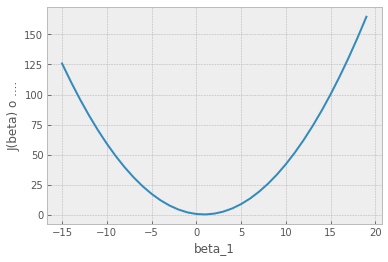

In [18]:
cost_func=[]
for beta_1 in beta1:
    cost_func.append(lr_cost_func(np.array([beta0, beta_1]), X_, y) )

plt.plot(beta1, cost_func)
plt.xlabel('beta_1')
plt.ylabel('J(beta) o ....')

In [19]:
beta0 = np.arange(-5, 7, 0.2)
beta1 = np.arange(-5, 7, 0.2)

In [20]:
cost_func = pd.DataFrame(index=beta0, columns=beta1)
cost_func.head()

,-5.0,-4.8,-4.6,-4.3999999999999995,-4.199999999999999,-3.999999999999999,-3.799999999999999,-3.5999999999999988,-3.3999999999999986,-3.1999999999999984,...,5.000000000000009,5.20000000000001,5.400000000000009,5.6000000000000085,5.80000000000001,6.000000000000011,6.20000000000001,6.400000000000009,6.60000000000001,6.800000000000011
-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for beta_0 in beta0:
    for beta_1 in beta1:
        cost_func.loc[beta_0, beta_1] = lr_cost_func(np.array([beta_0, beta_1]), X_, y)   

In [22]:
cost_func.head()

,-5.0,-4.8,-4.6,-4.3999999999999995,-4.199999999999999,-3.999999999999999,-3.799999999999999,-3.5999999999999988,-3.3999999999999986,-3.1999999999999984,...,5.000000000000009,5.20000000000001,5.400000000000009,5.6000000000000085,5.80000000000001,6.000000000000011,6.20000000000001,6.400000000000009,6.60000000000001,6.800000000000011
-5.0,29.7749,28.6239,27.5129,26.4419,25.4109,24.42,23.469,22.558,21.687,20.856,...,21.2251,22.0741,22.9631,23.8921,24.8611,25.8701,26.9191,28.0081,29.1371,30.3061
-4.8,28.7949,27.6439,26.5329,25.4619,24.4309,23.44,22.489,21.578,20.707,19.876,...,20.2451,21.0941,21.9831,22.9121,23.8811,24.8901,25.9391,27.0281,28.1571,29.3261
-4.6,27.8549,26.7039,25.5929,24.5219,23.4909,22.5,21.549,20.638,19.767,18.936,...,19.3051,20.1541,21.0431,21.9721,22.9411,23.9501,24.9991,26.0881,27.2171,28.3861
-4.4,26.9549,25.8039,24.6929,23.6219,22.5909,21.6,20.649,19.738,18.867,18.036,...,18.4051,19.2541,20.1431,21.0721,22.0411,23.0501,24.0991,25.1881,26.3171,27.4861
-4.2,26.0949,24.9439,23.8329,22.7619,21.7309,20.74,19.789,18.878,18.007,17.176,...,17.5451,18.3941,19.2831,20.2121,21.1811,22.1901,23.2391,24.3281,25.4571,26.6261


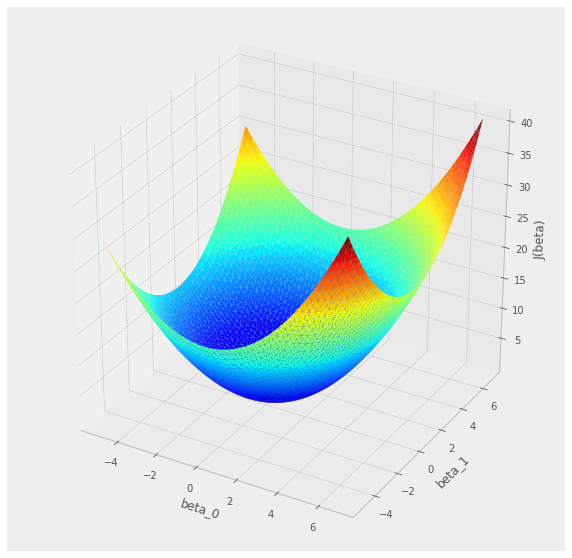

In [23]:
betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(betas[:, 0], betas[:, 1], cost_func.T.values.flatten().astype('float'), cmap=cm.jet, linewidth=0.1)

ax.set_xlabel('beta_0')
ax.set_ylabel('beta_1')
ax.set_zlabel('J(beta)')
plt.show()

Text(0, 0.5, 'beta_1')

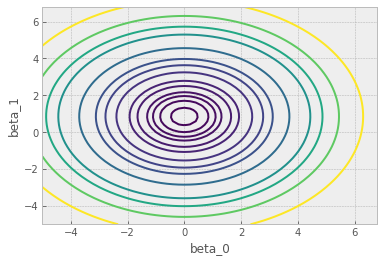

In [24]:
#Hagamos cortes paralelos a beto_0 beta_1
contour_levels = [0, 0.1, 0.25, 0.5, 0.75, 1, 1.5, 2, 3, 4, 5, 7, 10, 12, 15, 20]
plt.contour(beta0, beta1, cost_func.T.values, contour_levels)
plt.xlabel('beta_0')
plt.ylabel('beta_1')

In [25]:
#Veamos como diferentes betas son observados en un plot de contornos
betas = np.array([[0, 0],
                 [-1, -1],
                 [-5, 5],
                 [3, -2]])



Linear Regression with betas  [0 0]


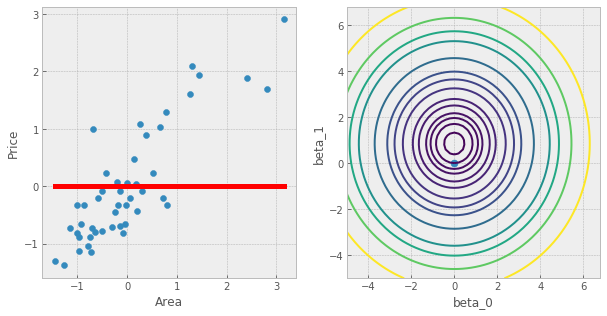



Linear Regression with betas  [-1 -1]


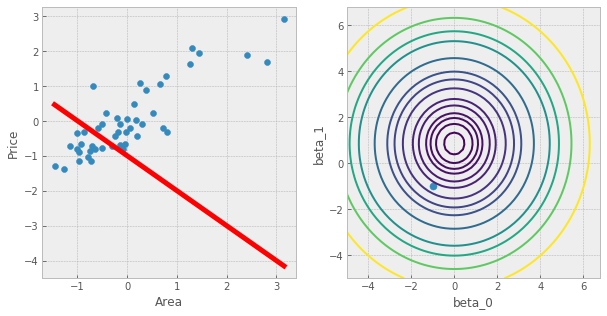



Linear Regression with betas  [-5  5]


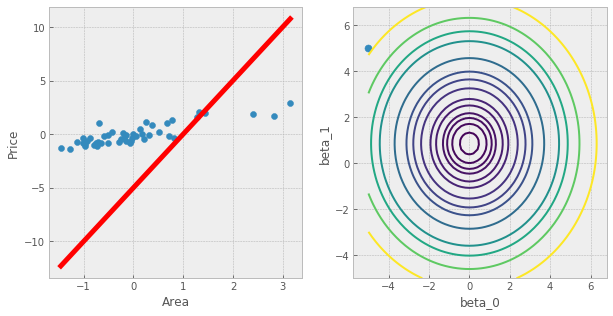



Linear Regression with betas  [ 3 -2]


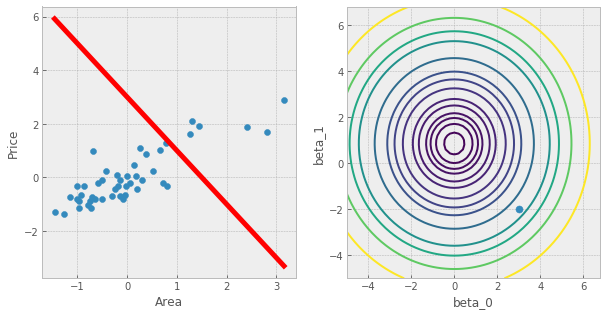

In [26]:
for beta in betas:
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], s=50)

    # scatter plot
    ax1.scatter(X, y)

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

## Gradiente descendente

Tenemos alguna función de costo $J(\beta_0, \beta_1)$

Queremos encontrar los betas que minimicen esta función: $\min_{\beta_0, \beta_1}J(\beta_0, \beta_1)$

Proceso:

* Empezamos con $\beta_0, \beta_1$

* Cambiamos los betas $\beta_0, \beta_1$ para minimizar $J(\beta_0, \beta_1)$
hasta que encontremos el minimo

### Algoritmo gradiente descendente

Repetimos hasta encontrar convergencia

## $$ \beta_j := \beta_j - \alpha \frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1)$$



mientras simultaneamente actualizamos j=0 y j=1

$\alpha$ hace referencia a la tasa de aprendizaje

Para el caso particular de una regresion lineal con una variable predictora y un intercepto el gradiente es calculado asi:

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (h_\beta(x_i)-y_i)^2$$

### $$\frac{\partial }{\partial \beta_j} J(\beta_0, \beta_1) = \frac{\partial }{\partial \beta_j} \frac{1}{2n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)^2$$

### $ j = 0: \frac{\partial }{\partial \beta_0} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ j = 1: \frac{\partial }{\partial \beta_1} =  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$

### Usando el algoritmo gradiente descendente:

Repetimos hasta encontrar convergencia {

### $ \beta_0 := \beta_0- \alpha  \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i)$

### $ \beta_1 := \beta_1- \alpha   \frac{1}{n}\sum_{i=1}^n (\beta_0 + \beta_1x_i-y_i) \cdot x_i$
}

Simultaneamente!

### Calculando el gradiente

In [27]:
# Calculo del gradiente
beta_ini = np.array([-1.5, 0.])

def gradient(beta, x, y):
    # Not vectorized
    gradient_0  = 1 / x.shape[0] * ((lr_h(beta, x) - y).sum())
    gradient_1  = 1 / x.shape[0] * ((lr_h(beta, x) - y)* x[:, 1]).sum()

    return np.array([gradient_0, gradient_1])

gradient(beta_ini, X_, y)

array([-1.5       , -0.85498759])

### Algoritmo gradiente descendente

In [28]:
def gradient_descent(x, y, beta_ini, alpha, iters): 
    betas = np.zeros((iters, beta_ini.shape[0] + 1))

    beta = beta_ini
    for iter_ in range(iters):

        betas[iter_, :-1] = beta
        betas[iter_, -1] = lr_cost_func(beta, x, y)
        beta -= alpha * gradient(beta, x, y)
        
    return betas

In [29]:
iters = 100
alpha = 0.05
beta_ini = np.array([-4., -4.])

betas =  gradient_descent(X_, y, beta_ini, alpha, iters)

Veamos la evolución de la función de costo por iteración:

Text(0, 0.5, 'J(beta)')

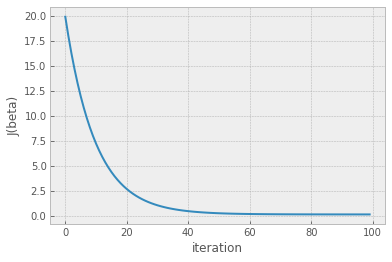

In [30]:
plt.plot(range(iters), betas[:, -1])
plt.xlabel('iteration')
plt.ylabel('J(beta)')

Entendamos lo que pasa en cada iteración



Linear Regression with betas  [-4. -4.]


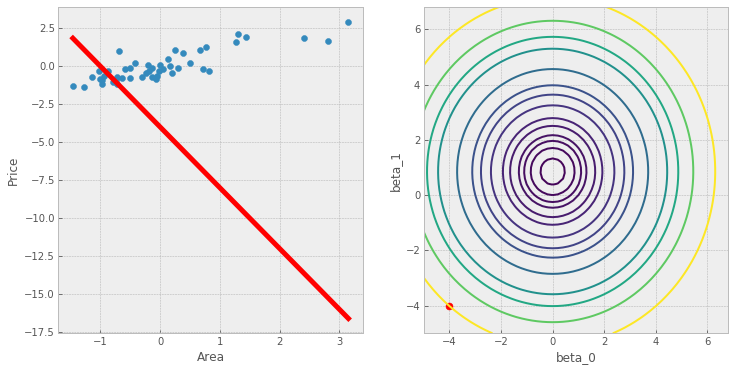



Linear Regression with betas  [-2.39494776 -2.05187282]


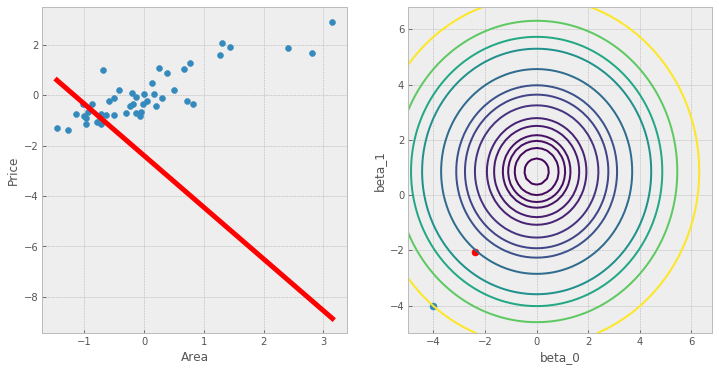



Linear Regression with betas  [-1.43394369 -0.88545711]


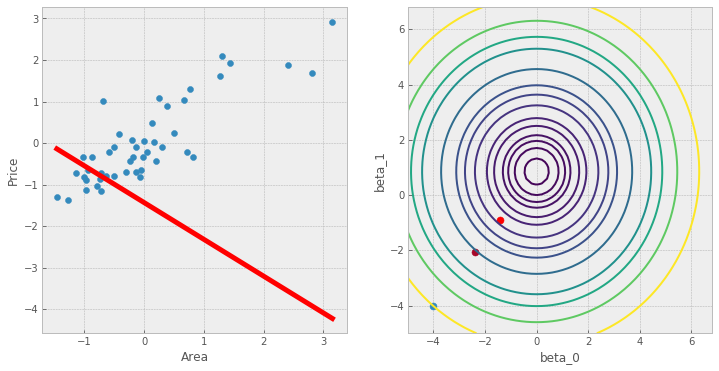



Linear Regression with betas  [-0.85855506 -0.18708094]


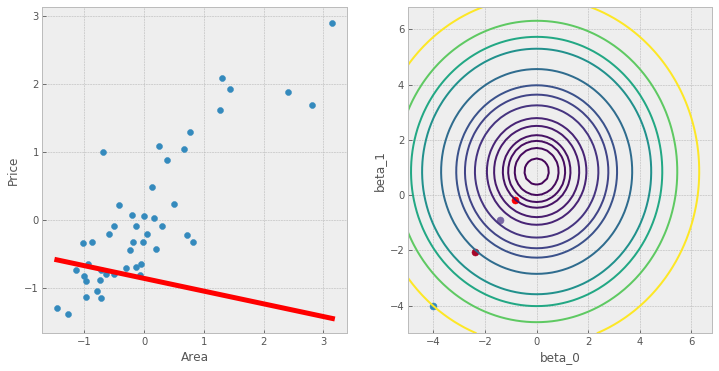



Linear Regression with betas  [-0.51404863  0.23106267]


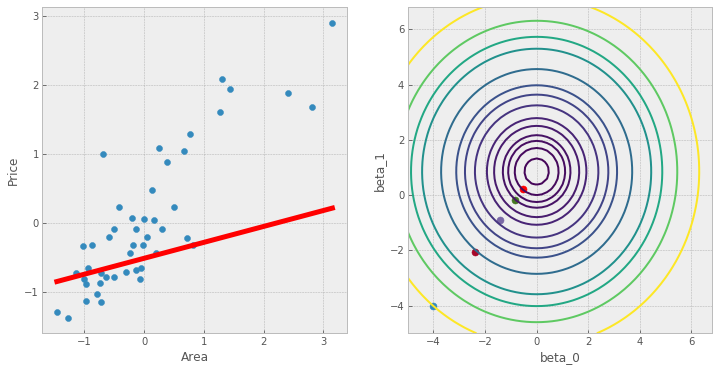



Linear Regression with betas  [-0.3077799   0.48142069]


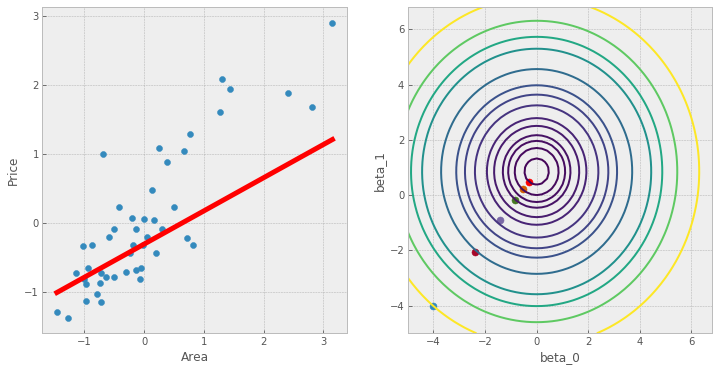



Linear Regression with betas  [-0.1842792   0.63131929]


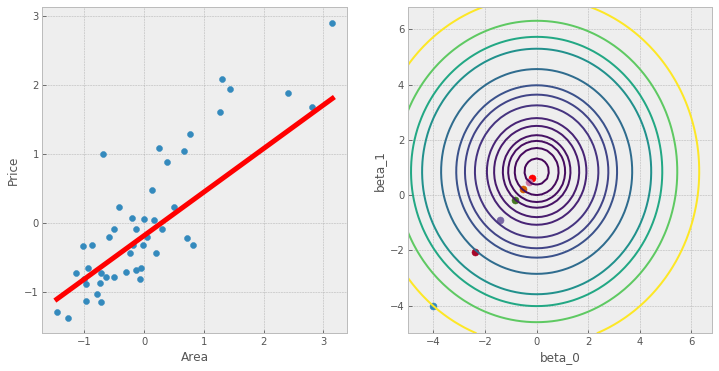



Linear Regression with betas  [-0.11033476  0.72106912]


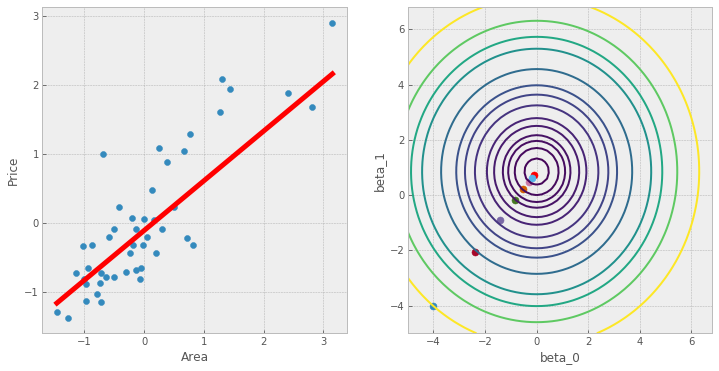



Linear Regression with betas  [-0.0660615   0.77480566]


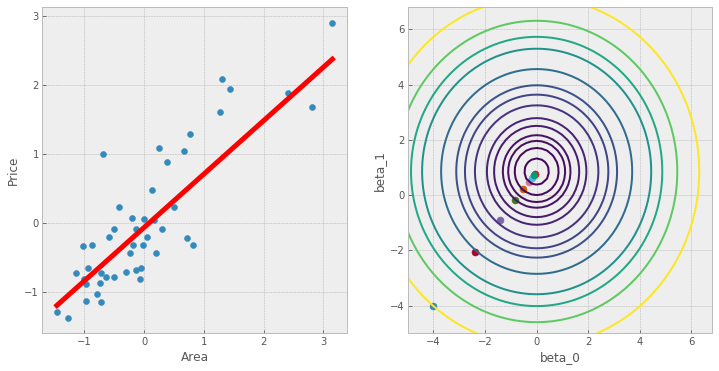



Linear Regression with betas  [-0.03955346  0.8069797 ]


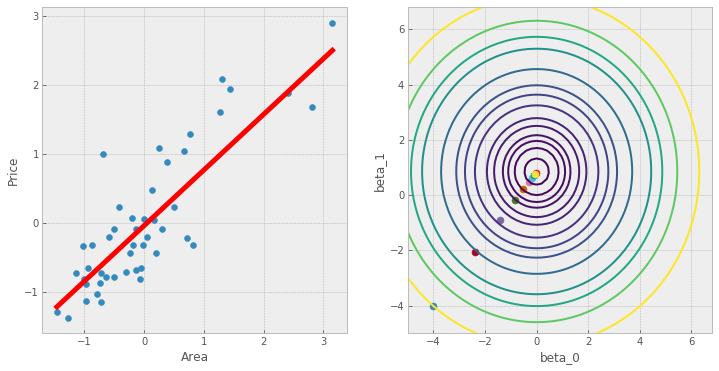

In [31]:
betas_ = betas[range(0, iters, 10), :-1]
for i, beta in enumerate(betas_):
    print('\n\nLinear Regression with betas ', beta)
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 6))
    ax2.contour(beta0, beta1, cost_func.T.values, contour_levels)
    ax2.set_xlabel('beta_0')
    ax2.set_ylabel('beta_1')
    ax2.scatter(beta[0], beta[1], c='r', s=50)
    
    if i > 0:
        for beta_ in betas_[:i]:
            ax2.scatter(beta_[0], beta_[1], s=50)

    # scatter plot
    ax1.scatter(X, y)

    # Plot the linear regression
    x = np.c_[np.ones(2), [X.min(), X.max()]]
    ax1.plot(x[:, 1], lr_h(beta, x), 'r', lw=5)
    ax1.set_xlabel('Area')
    ax1.set_ylabel('Price')
    plt.show()

Los betas estimados son:

In [32]:
betas[-1, :-1]

array([-0.02492854,  0.82473065])

## Ecuaciones normales

Encontrar los betas es un ejercicio de resolver  un sistema de ecuaciones:

## $$ \beta = (X^T X)^{-1} X^T Y $$

Para que $$(X^T X)^{-1}$$ exista, la matriz X debe ser de rango completo, es decir las columnas de X deben ser linealmente independientes.

In [33]:
beta = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))

In [34]:
beta

array([-5.80624192e-17,  8.54987593e-01])

### Estimación de RL con sklearn

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linreg = LinearRegression(fit_intercept=False) # Si intercept es falso, se supone que los datos ya están centrados

In [37]:
linreg.fit(X_, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [38]:
linreg.coef_

array([-8.88030989e-17,  8.54987593e-01])

### Usemos Gradiente Descendente

In [39]:
from sklearn.linear_model import SGDRegressor

In [40]:
linreg2 = SGDRegressor(fit_intercept=False,max_iter=500,tol = 0.0000001,alpha=0.0001)

In [41]:
linreg2.fit(X_, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=False, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=500,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=1e-07, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [42]:
linreg2.coef_

array([-3.40701488e-04,  8.54333324e-01])

# Comparemos los metodos

|Gradiente Descendente|Ecuaciones Normales|
| :------------- | :------------- |
| Tenemos que escoger $\alpha$| NO tenemos que escoger $\alpha$|
|Necesita iteraciones | NO necesita iteraciones|
|Funciona bien incluso cuando $k$ es grande |Lento si $k$ es muy grande |
||Necesitamos calcular la inversa $(X^TX)^{-1}$|

k=Numero de variables predictoras

# Regresión con multiples variables predictora

Creemos una variable adicional

In [43]:
data['area2'] = data['area'] ** 2
data.head()

,area,bedroom,price,area2
0,2104,3,399900,4426816
1,1600,3,329900,2560000
2,2400,3,369000,5760000
3,1416,2,232000,2005056
4,3000,4,539900,9000000


In [44]:
clf1 = LinearRegression(normalize=True)
clf2 = SGDRegressor(max_iter=10000,alpha=0.01)

In [45]:
x_1=data[['bedroom','area','area2']]
y_1=data[' price']

In [46]:
clf1.fit(x_1, y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [47]:
print(clf1.coef_)
print(clf1.intercept_)

[-9.44895685e+03  1.52175746e+02 -2.49921879e-03]
77461.24759555137


Hagamos algunas predicciones

In [48]:
x_pred=x_1[0:10]

In [49]:
x_pred

,bedroom,area,area2
0,3,2104,4426816
1,3,1600,2560000
2,3,2400,5760000
3,2,1416,2005056
4,4,3000,9000000
5,4,1985,3940225
6,3,1534,2353156
7,3,1427,2036329
8,3,1380,1904400
9,3,1494,2232036


In [50]:
clf1.predict(x_pred)

array([358228.56575472, 286197.57119395, 399940.66818517, 269033.11717709,
       473699.69029432, 331886.79245474, 276670.92034289, 261179.93546952,
       254357.39482439, 270886.59586668])

In [51]:
np.dot(clf1.coef_,x_pred[0:1].T)+clf1.intercept_

array([358228.56575472])

# Metricas para problemas de regresión

Las métricas de evaluación para problemas de clasificación, como **accuracy**, no son útiles para problemas de regresión. Necesitamos métricas de evaluación diseñadas para comparar **valores continuos**.

Tres métricas de evaluación comunes para problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [52]:
y_pred = clf1.predict(x_1)

In [53]:
from sklearn import metrics

In [54]:
print('MAE:', metrics.mean_absolute_error(data[' price'], y_pred))
print('MSE:', metrics.mean_squared_error(data[' price'], y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(data[' price'], y_pred)))

MAE: 51431.28546030436
MSE: 4081986106.9179053
RMSE: 63890.42265408725


Comparemos estas metricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque "castiga" errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** es incluso más popular que MSE, porque RMSE es interpretable en las unidades "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas.

# Comparing linear regression with other models

Ventajas:

- Simple de explicar
- Altamente interpretable
- El entrenamiento y la predicción del modelo son rápidos
- No requiere el ajuste de parametros
- Puede funcionar bien con un pequeño número de observaciones
- Bien entendido

Desventajas:

- Presume una relación lineal entre las variables y la respuesta
- El rendimiento (generalmente) no es competitivo con los mejores métodos de aprendizaje supervisados

Notebook construido a partir de notas de la clase Mineria de Datos - Maestría en Analytics -  Universidad de los Andes - Profesor Alejandro Correa